# Práctica 4 - Errores y Ataques en redes
### Erik Juárez Guerrero

# Importamos bibliotecas a utilizar

In [2]:
# Para crear y análizar redes
import networkx as nx
# Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
# Para generar errores aleatorios
import random

# Reutilización de código

In [3]:
def grafica_funciones(titulo,f1_valores, f2_valores,ejex,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta):
    plt.title(titulo)
    if ejex == None:
        plt.plot(f1_valores, label=f1_leyenda)  
        plt.plot(f2_valores, label=f2_leyenda)
    else:
        plt.plot(ejex,f1_valores, label=f1_leyenda)  
        plt.plot(ejex,f2_valores, label=f2_leyenda)
    plt.xlabel(ejex_etiqueta)
    plt.ylabel(ejey_etiqueta)
    plt.legend()
    plt.show()


def prop_componente_gigante(G, n):
    """
    Recibe una red y el número de nodos de esta y regresa la porporción del
    componente gigante.

    Parámetros
    ----------
    G : Red
        red generada con NetworkX.
    n : Entero
        Número de nodos de la red.

    Returns
    -------
    prop_gc : Flotante
        La proporción del componente gigante en relación al númmero de nodos
        original en la red.

    """
    
    # creamos un generador de componentes
    cc_gen = nx.connected_components(G)
    
    cc = [ ]
    len_cc = [ ]
    
    # almacenamos los componentes usando el generador, ademas de crear 
    # una lista de las longitudes de cada componente
    for i in cc_gen:
        cc.append(i)
        len_cc.append(len(i))
        
    # averiguamos cual es el inice del componete gigante en la lista
    gc_indice = len_cc.index(max(len_cc))
    
    # se calcula la proporción del componente gigante
    prop_gc = len(cc[gc_indice]) / n

    return prop_gc


def num_componentes_conectados(G):
    """
    Recive una red y regresa la cantidad de sus componentes.

    Parámetros
    ----------
    G : red
        red generada con NetworkX.

    Retorna
    -------
    num_cc : Entero
        número de componentes de la red.

    """
    
    return nx.number_connected_components(G)

# Actividad 1
Implementar funciones para simular errores y ataques.

In [4]:
def error(G):
    """
    Simula errores en una red, recibe una red, elimina aleatoriamente un nodo y
    regresa la red.

    """
    
    # Guarda los nodos en un arreglo
    nodos = G.nodes()
    
    #Elige al azar un nodo
    nodo_fallido = random.choice(list(nodos))
    
    # Remueve el nodo elegido
    G.remove_node(nodo_fallido)

    return G


def errores_secuenciales(G, num_errores):
    """
    Realiza errores secuencialmente a una red.
    Regresa una tupla con dos listas. 
    * una lista con los de componente conectados de cada error.
    * una lista con la poroporción del componente gigante en cada .

    """
    
    cc_lista = list()
    gc_lista = list()
    n = len(G)
    
    for i in range(num_errores):
        G = error(G)
        num_cc = num_componentes_conectados(G)
        tam_cg = prop_componente_gigante(G, n)
        cc_lista.append(num_cc)
        gc_lista.append(tam_cg)
        
    return (cc_lista, gc_lista)


def ataque(G):
    """
    Simula atqques en una red, recibe una red, elimina el nodo con mayor grado
    y regresa la red.

    """
    
    nodos = G.nodes() 
    deg_max = 0    
    nodo_atacado = None
    
    # obtiene el nodo de mayor grado
    for i in list(nodos):
        if G.degree[i] > deg_max:
            
            deg_max = G.degree[i]
            
            nodo_atacado = i
    
    # elimina el nodo atacado
    if nodo_atacado:
        G.remove_node(nodo_atacado)
    else:
        error(G)
    
    return G


def ataques_secuenciales(G, num_ataques):
    """
     Realiza ataques secuencialmente a una red.
     Regresa una tupla con dos listas. 
    * una lista con los de componente conectados de cada error.
    * una lista con la poroporción del componente gigante en cada error.

    """
    
    cc_lista = list()
    gc_lista = list()
    n = len(G)
    
    for i in range(num_ataques):
        G = ataque(G)
        num_cc = num_componentes_conectados(G)
        tam_cg = prop_componente_gigante(G,n)
        cc_lista.append(num_cc)
        gc_lista.append(tam_cg)
        
    return (cc_lista, gc_lista)

# Actividad 2
* Crear una red aleatoria con n = 1000 y p = 0.06.
* Crear una red de escala libre con n = 1000 y m = 14.

In [5]:
# red aleatoria
rnd_G = nx.gnp_random_graph(1000, 0.06)

# red de escala libre
sf_G = nx.barabasi_albert_graph(1000, 10)

# copias de las redes para los ataques
rnd_G2 = nx.Graph(rnd_G)
sf_G2 = nx.Graph(sf_G)

# Actividad 3
Gráfica de la distribución de grados de las redes.

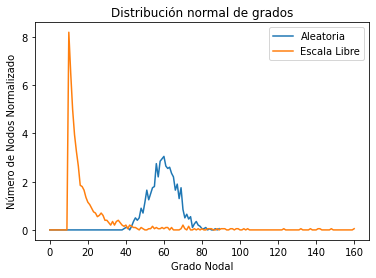

In [6]:
# normalizamos
dist_rnd = nx.degree_histogram(rnd_G)
dist_norm_rnd_G = [ ]
for i in dist_rnd:
    dist_norm_rnd_G.append(i / 20)

dist_sf_G = nx.degree_histogram(sf_G)
dist_norm_sf_G = [ ]
for i in dist_sf_G:
    dist_norm_sf_G.append(i / 20)

    
# Graficasmos
grafica_funciones("Distribución normal de grados", dist_norm_rnd_G, 
                  dist_norm_sf_G, None, "Aleatoria", "Escala Libre", 
                  "Grado Nodal", "Número de Nodos Normalizado"  )

# Actividad 4
Simulación de errores en las redes.

In [7]:
rnd_cc_error_lst, rnd_gc_error_lst = errores_secuenciales(rnd_G, 999)
sf_cc_error_lst, sf_gc_error_lst = errores_secuenciales(sf_G, 999)

# Actividad 5
Gráfica componentes conectados vs número de errores.

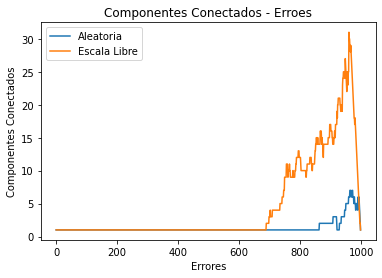

In [8]:
grafica_funciones("Componentes Conectados - Erroes", rnd_cc_error_lst, 
                  sf_cc_error_lst, None, "Aleatoria", "Escala Libre", 
                  "Errores", "Componentes Conectados"  )

# Actividad 6
Gráfica proporción del componente gigante vs número de errores.

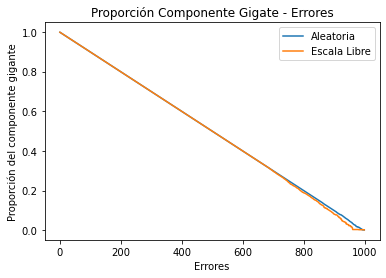

In [9]:
grafica_funciones("Proporción Componente Gigate - Errores", rnd_gc_error_lst,
                  sf_gc_error_lst, None, "Aleatoria", "Escala Libre", 
                  "Errores", "Proporción del componente gigante" )

# Actividad 7
Simulación de ataques en las redes.

In [10]:
rnd_cc_attack_lst, rnd_gc_attack_lst = ataques_secuenciales(rnd_G2, 999)
sf_cc_attack_lst, sf_gc_attack_lst = ataques_secuenciales(sf_G2, 999)

# Actividad 8
Gráfica componentes conectados vs número de ataques.

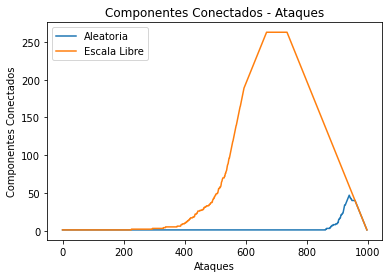

In [11]:
grafica_funciones("Componentes Conectados - Ataques", rnd_cc_attack_lst, 
                  sf_cc_attack_lst, None, "Aleatoria", "Escala Libre", 
                  "Ataques", "Componentes Conectados" )

# Actividad 9
Gráfica proporción del componente gigante vs número de ataques.

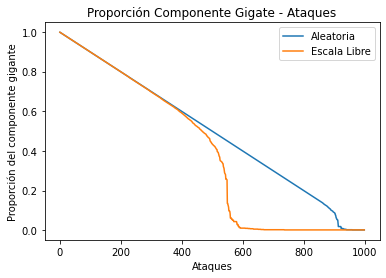

In [12]:
grafica_funciones("Proporción Componente Gigate - Ataques", rnd_gc_attack_lst,
                  sf_gc_attack_lst, None, "Aleatoria", "Escala Libre", 
                  "Ataques", "Proporción del componente gigante" )